In [2]:
%pylab inline
from numpy import *
from scipy import integrate
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


## Callable function for the differential equation

In [3]:
def driven_pendulum(t,theta,A,w,Q):
    return [
        theta[1],
        A*sin(w*t) - theta[1]/Q - sin(theta[0])
    ]

## Chaotic Pendulum Behavior

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.chaotic>

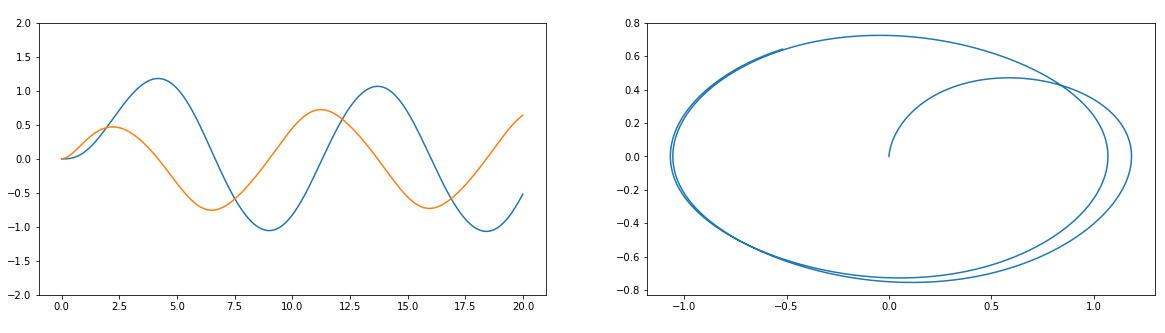

In [4]:
def chaotic(init_angle=0,init_vel=0,driv_ampl=1.5,driv_freq=2./3,qual=0.5):
    initial_conditions,t0 = [init_angle, init_vel],0
    time_list = []
    sol = []
    time_step = 0.01
    end_time = 20
    system = integrate.ode(driven_pendulum)
    system.set_f_params(driv_ampl,driv_freq,qual)
    system.set_initial_value(initial_conditions,t0)
    while system.successful and system.t < end_time:
        time_list.append(system.t)
        sol.append(system.integrate(system.t+time_step))
    sol =asarray(sol)
    fig = figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_ylim(-2,2)
    ax1.set_xlabel("time").set_color('white')
    ax1.plot(time_list,sol)
    ax2 = fig.add_subplot(1,2,2)
#     ax2.set_xlim(-2,2)
#     ax2.set_ylim(-2,2)
    ax2.set_xlabel("position").set_color('white')
    ax2.set_ylabel("velocity").set_color('white')
    ax2.set_title("Phase space plot").set_color('white')
    ax2.plot(sol.T[0],sol.T[1])
    
interact(
    chaotic,
    init_angle=(-1.0,1.0,0.1),
    init_vel=(-2.0,2.0,0.1),
    driv_ampl=(0.0,10.0,0.5),
    driv_freq=(0.0,2.0,0.1),
    qual=(0.1,10.0,0.01)
        )

## Looking at Resonance

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.resonance>

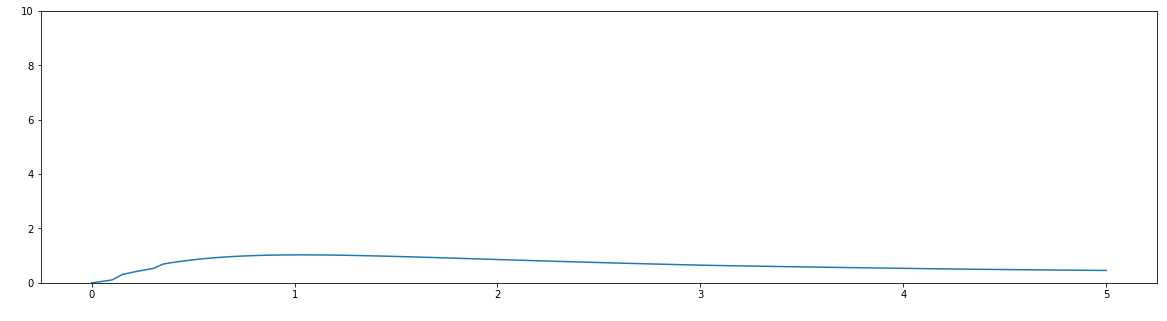

In [5]:
def resonance(qual=0.5):
    initial_conditions,t0 = [0,0],0

    time_step = 0.01
    end_time = 20
    freq_list = linspace(0,5,10**2)
    p2p = []
    for driv_freq in freq_list:
        sol = []
        system = integrate.ode(driven_pendulum)
        system.set_f_params(1,driv_freq,qual)
        system.set_initial_value(initial_conditions,t0)
        while system.successful and system.t < end_time:
#             time_list.append(system.t)
            sol.append(system.integrate(system.t+time_step))
        sol=asarray(sol)
        # Peak to Peak current
        p2p.append(sol.T[1].max() - sol.T[1].min())
    fig = figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_ylim(0,10)
    ax1.set_xlabel("frequency").set_color('white')
    ax1.set_ylabel("response current").set_color('white')
    ax1.plot(freq_list,p2p)    
interact(
    resonance,
    qual=(0.1,10.0,0.01)
        )

So this resembles nothing like the beautiful resonance curves we see. Chaos has no resonance.